# **Data Cleaning and Preprocessing For Hindi**

### **Imports**

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from datasets import load_dataset
nltk.download('punkt')
import re
import unicodedata

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### **Loading the Dataset**

In [30]:
train_df = pd.read_csv("../data/original/Hindi_text_summ/train.csv")
test_df = pd.read_csv("../data/original/Hindi_text_summ/test.csv")

display(train_df.head())
display(test_df.head())

,headline,article
0,EXCLUSIVE: दिल्ली में डीजल टैक्सियों पर बैन से...,दिल्ली में सुप्रीम कोर्ट के डीज़ल टैक्सियों को...
1,जॉर्डन: राष्ट्रपति मुखर्जी ने 86 करोड़ डॉलर के...,जॉर्डन के ऐतिहासिक दौरे पर पहुंचे राष्ट्रपति प...
2,UN में पाकिस्तान की राजदूत मलीहा लोधी ने कराई ...,पाकिस्तानी नेताओं को विवादित और हास्यास्पद बया...
3,38 देशों में पीएम नरेंद्र मोदी बायोपिक को रिली...,पीएम नरेंद्र मोदी बायोपिक में विवेक ओबेरॉय ने ...
4,13 अगस्त 2011: दिनभर की बड़ी खबरें पढ़ें,"देश, दुनिया, महानगर, खेल, आर्थिक और बॉलीवुड मे..."


,headline,article
0,"पठानकोट पहुंचे PM मोदी, एयरबेस का जायजा ले बॉर...",प्रधानमंत्री नरेंद्र मोदी पठानकोट एयरबेस पहुंच...
1,सचिन ने देशवासियों को समर्पित किया अपना दोहरा शतक,सचिन तेंदुलकर ने एकदिवसीय अंतरराष्ट्रीय क्रिके...
2,एनआईए करेगी छत्तीसगढ़ में सुरक्षा खामियों की ज...,केंद्रीय गृह राज्य मंत्री आर. पी. एन. सिंह ने ...
3,सीधी बात: शाह बोले- हमारा बस चलता तो अब तक मं...,भारतीय जनता पार्टी (बीजेपी) के राष्ट्रीय अध्यक...
4,"ऋषभ पंत के पास यूनिक टैलेंट, उसके साथ छेड़छाड़ न...",ऋषभ पंत की कभी कभार इस बात के लिए आलोचना की जा...


### **Basic EDA**

In [31]:
# Check nulls and duplicates
print(train_df.isnull().sum())
print("Duplicates:", train_df.duplicated().sum())

# Basic stats
print(train_df.describe(include='all'))

# Check dialogue and summary length
train_df["headline_len"] = train_df["headline"].apply(lambda x: len(str(x).split()))
train_df["article_len"] = train_df["article"].apply(lambda x: len(str(x).split()))

train_df[["headline_len", "article_len"]].describe()

headline    14
article      0
dtype: int64
Duplicates: 63
                                        headline  \
count                                     266593   
unique                                    264681   
top     Tech Wrap: यहां जानें आज की 5 बड़ी खबरें   
freq                                         426   

                                                  article  
count                                              266607  
unique                                             266508  
top     हमारे साझेदार 'अनरियल टाइम्स' की खास व्यंग्यात...  
freq                                                    5  


,headline_len,article_len
count,266607.000000,266607.000000
mean,11.468607,367.662559
std,3.095791,344.351152
min,1.000000,1.000000
25%,9.000000,205.000000
50%,12.000000,298.000000
75%,14.000000,420.000000
max,226.000000,16335.000000


***Dialogue and Summary Lengths***

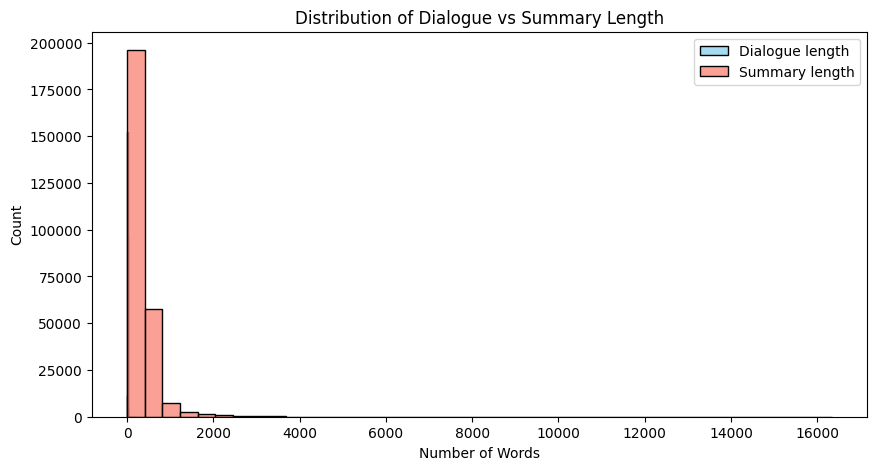

In [32]:
plt.figure(figsize=(10,5))
sns.histplot(train_df["headline_len"], bins=40, color='skyblue', label='Dialogue length')
sns.histplot(train_df["article_len"], bins=40, color='salmon', label='Summary length')
plt.legend()
plt.title("Distribution of Dialogue vs Summary Length")
plt.xlabel("Number of Words")
plt.show()

- Left Skewed

***World Cloud Visualization***

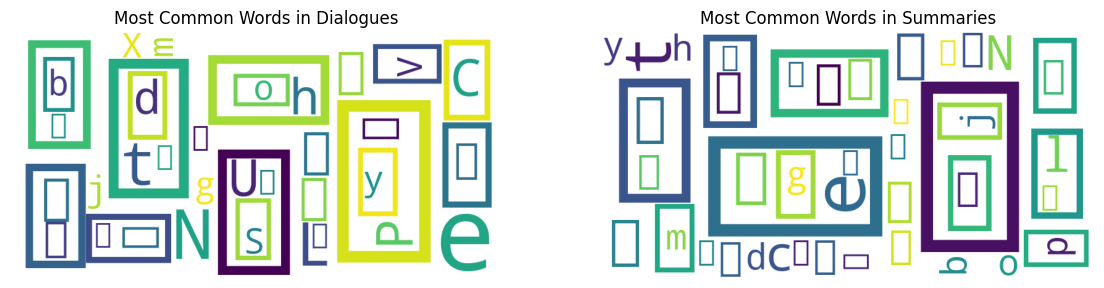

In [33]:
dialogue_text = " ".join(str(train_df["headline"]))
summary_text = " ".join(str(train_df["article"]))

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.imshow(WordCloud(width=800, height=400, background_color='white').generate(dialogue_text))
plt.title("Most Common Words in Dialogues")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(WordCloud(width=800, height=400, background_color='white').generate(summary_text))
plt.title("Most Common Words in Summaries")
plt.axis("off")
plt.show()

### **Text Cleaning**

In [34]:
def clean_hindi_mixed_text(text):
    if not isinstance(text, str):
        return ""

    text = unicodedata.normalize('NFC', text)
    text = re.sub(r"http\S+|www\S+|@\w+|#\w+", " ", text)
    text = re.sub(r"[^\u0900-\u097Fa-zA-Z\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()

    return text


train_df["clean_headline"] = train_df["headline"].apply(clean_hindi_mixed_text)
train_df["clean_article"] = train_df["article"].apply(clean_hindi_mixed_text)
train_df.head(2)

,headline,article,headline_len,article_len,clean_headline,clean_article
0,EXCLUSIVE: दिल्ली में डीजल टैक्सियों पर बैन से...,दिल्ली में सुप्रीम कोर्ट के डीज़ल टैक्सियों को...,13,233,EXCLUSIVE दिल्ली में डीजल टैक्सियों पर बैन से ...,दिल्ली में सुप्रीम कोर्ट के डीज़ल टैक्सियों को...
1,जॉर्डन: राष्ट्रपति मुखर्जी ने 86 करोड़ डॉलर के...,जॉर्डन के ऐतिहासिक दौरे पर पहुंचे राष्ट्रपति प...,12,392,जॉर्डन राष्ट्रपति मुखर्जी ने करोड़ डॉलर के संय...,जॉर्डन के ऐतिहासिक दौरे पर पहुंचे राष्ट्रपति प...


***Token count After cleaning***

In [35]:
train_df["clean_headline_len"] = train_df["clean_headline"].apply(lambda x: len(x.split()))
train_df["clean_article_len"] = train_df["clean_article"].apply(lambda x: len(x.split()))

print(train_df[["clean_headline_len", "clean_article_len"]].describe())

       clean_headline_len  clean_article_len
count       266607.000000      266607.000000
mean            11.371866         362.007325
std              3.075925         341.691557
min              0.000000           1.000000
25%              9.000000         203.000000
50%             11.000000         293.000000
75%             14.000000         412.000000
max            222.000000       15998.000000


### **Removing Outliers**

In [36]:
# Filter out empty or very short text
train_df = train_df[train_df["clean_article_len"] > 30]
train_df = train_df[train_df["clean_headline_len"] > 3]

# Cap very long articles (to prevent memory overload during tokenization)
train_df = train_df[train_df["clean_article_len"] < 2000]

# Reset index
train_df = train_df.reset_index(drop=True)

print("Final usable Hindi samples:", len(train_df))

Final usable Hindi samples: 263536


### **Saving the Dataset**

In [37]:
train_df[["clean_headline", "clean_article"]].to_csv("../data/clean/Hindi_text_summ/clean_Hinditxt_train.csv", index=False)
test_df.to_csv("../data/clean/Hindi_text_summ/clean_Hinditxt_test.csv", index=False)

print("Cleaned dataset saved at data/clean/Hindi_text_summ")

Cleaned dataset saved at data/clean/Hindi_text_summ


# **Conclusion**

***EDA Summary:***

    - The dataset contains ~260000 article-headline pairs.

    - Average article length: ~362 words.

    - Average headline length: ~11 words.

    - Data is well-structured and mostly clean; minor normalization done.

    - After preprocessing, extreme outliers removed, leaving balanced input for model training.